<a href="https://colab.research.google.com/github/HoanChan/TableVision/blob/main/border_table_detection.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

In [1]:
#@title Cài đặt kiểm tra môi trường và tải mã nguồn để lấy dữ liệu
# Kiểm tra hiện tại có phải đang ở trong colaboratory hay không
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !git clone https://github.com/HoanChan/TableVision.git TableVision
    %cd TableVision
else:
    print("Running on Local")
prePath = "/content/TableVision/" if IN_COLAB else ""

Running on Local


In [2]:
from utils.ocr import *

detector = init_VietOCR()

Đã cài đặt thư viện nhận diện văn bản


/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


<Figure size 1000x2000 with 0 Axes>

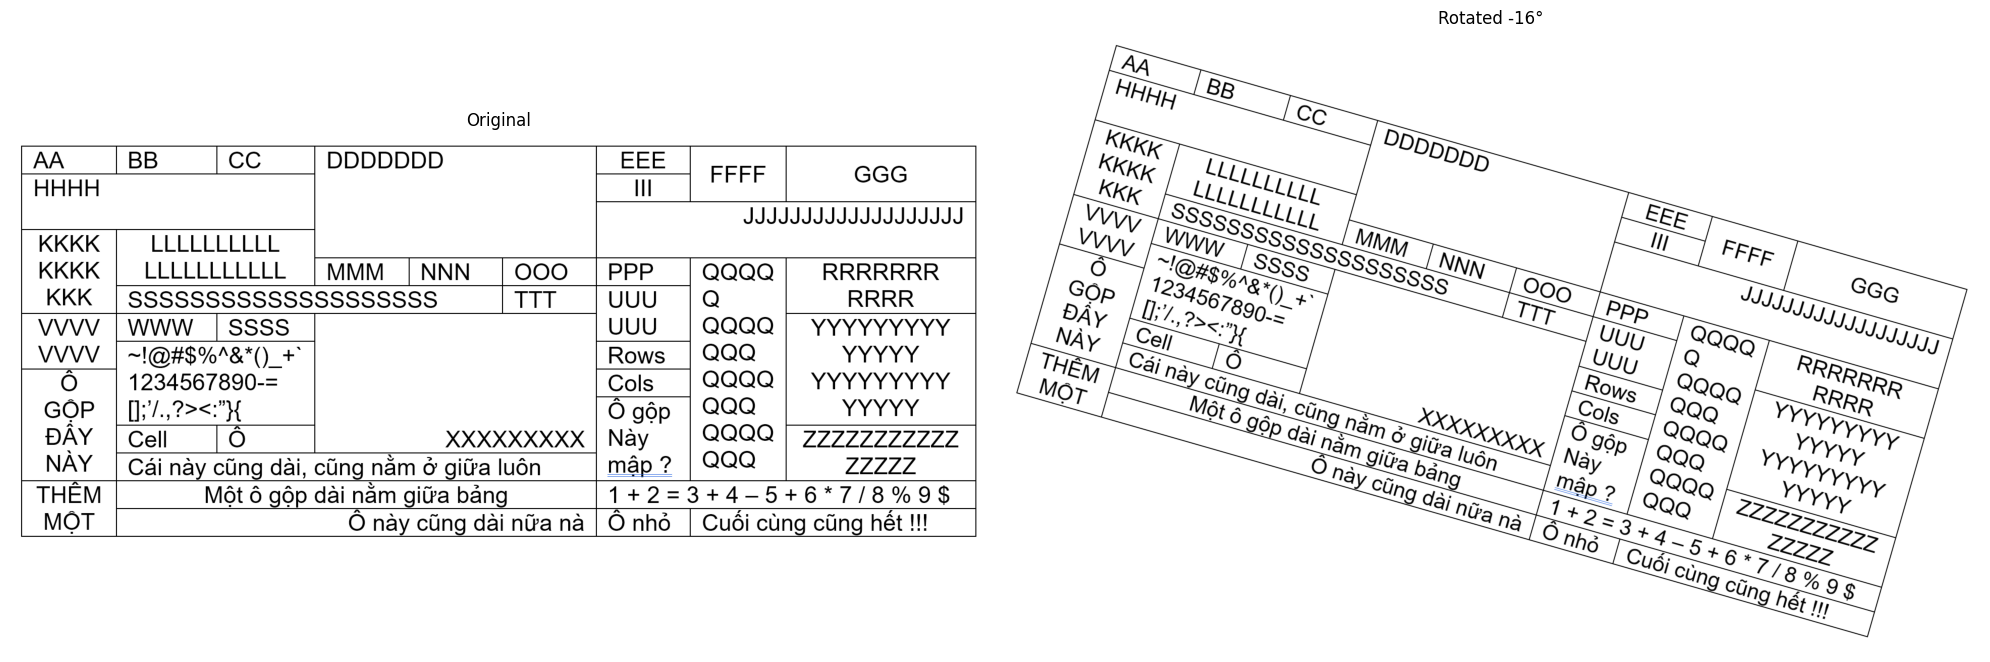

In [3]:
from utils.cv import *
from matplotlib import pyplot as plt
import cv2
import random

image_path = prePath + "sample/fullborder.png"
image = cv2.imread(image_path)
angle = random.randint(-30, 30)
rotated_image = rotate_image(image, angle)
# thiết lập kích thước hiển thị ảnh
plt.figure(figsize=(10, 20))
# hiển thị ảnh gốc và ảnh đã xoay
display_images_with_labels([(image, "Original"), (rotated_image, f"Rotated {str(angle)}°")], (1, 2), show_axis=False)

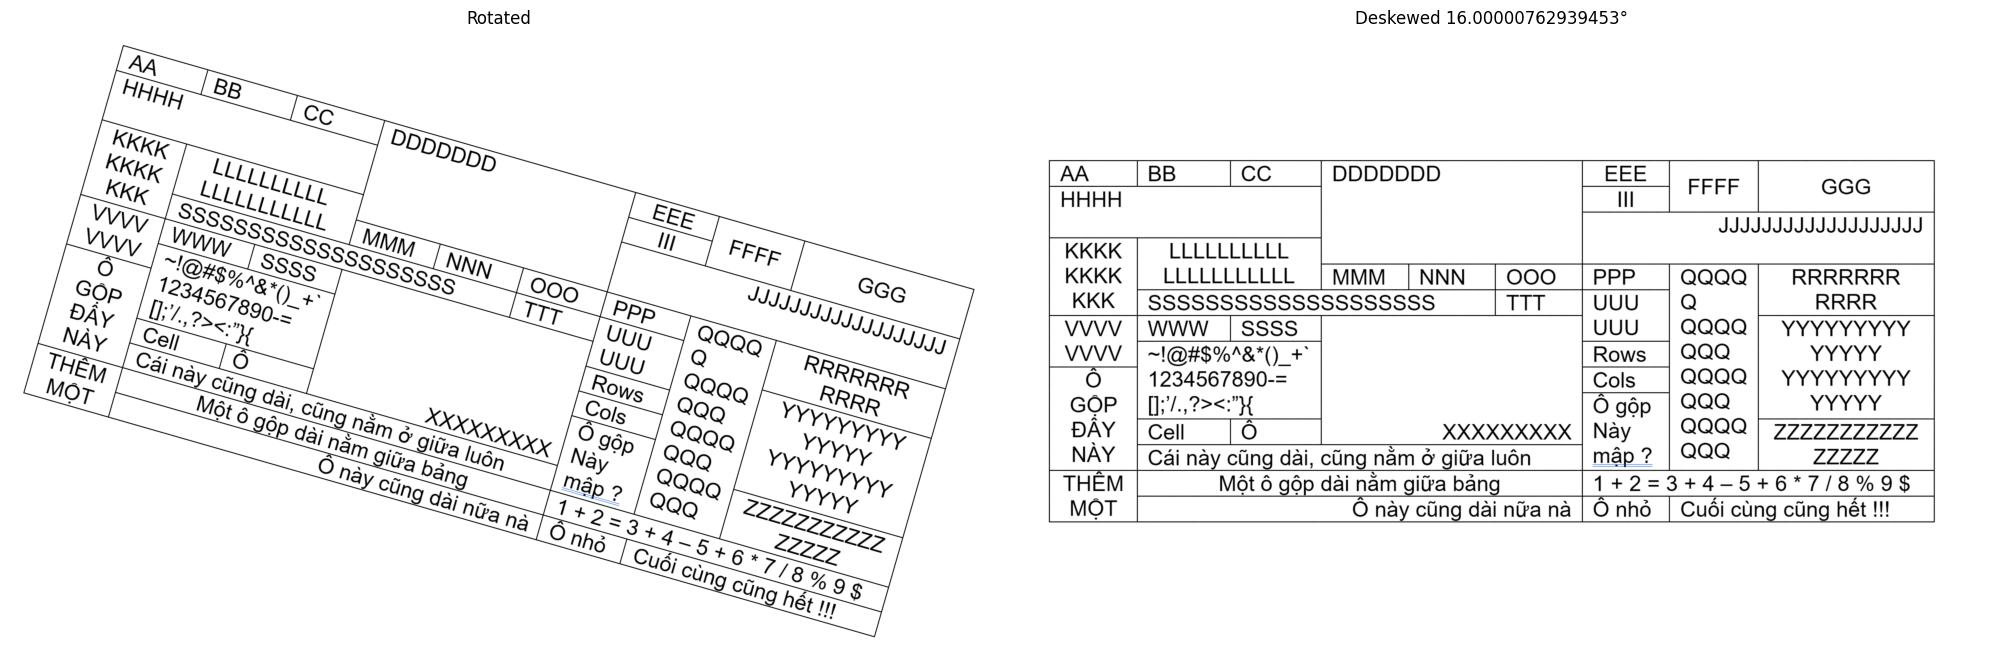

In [4]:
image_ok, calc_angle = deskew_image(rotated_image)
display_images_with_labels([(rotated_image, "Rotated"), (image_ok, f"Deskewed {str(calc_angle)}°")], (1, 2), show_axis=False)

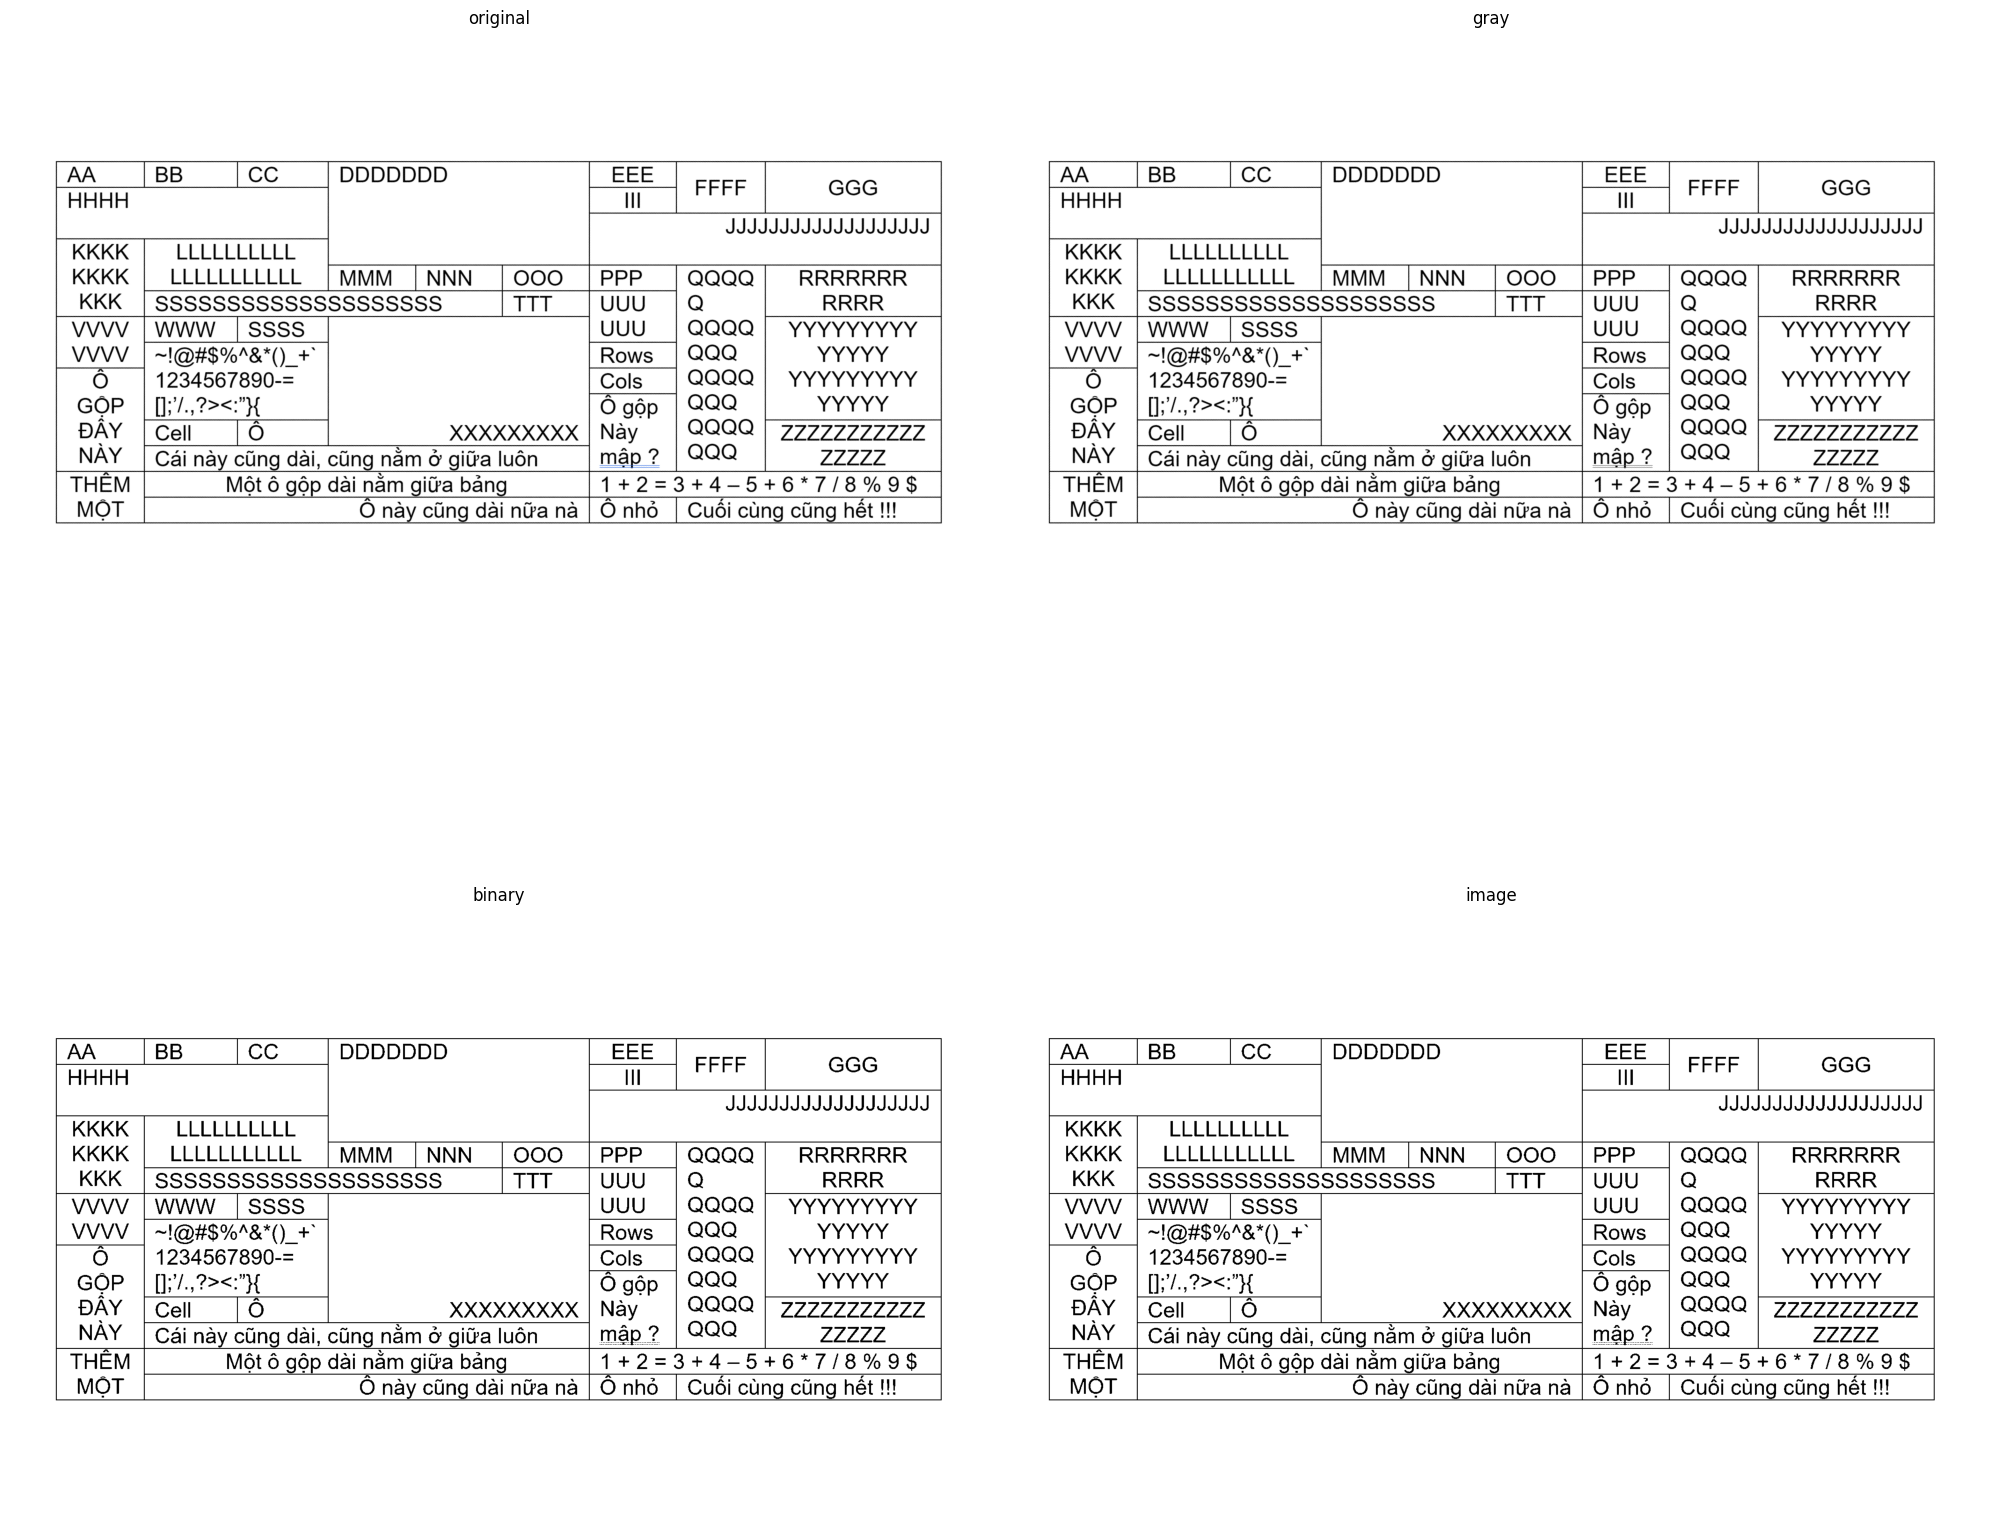

In [5]:
from detection.border_table_detection import *
outPre, image_pre = preProcessing(image_ok)
display_images_with_labels(outPre, (2, 2), show_axis=False)

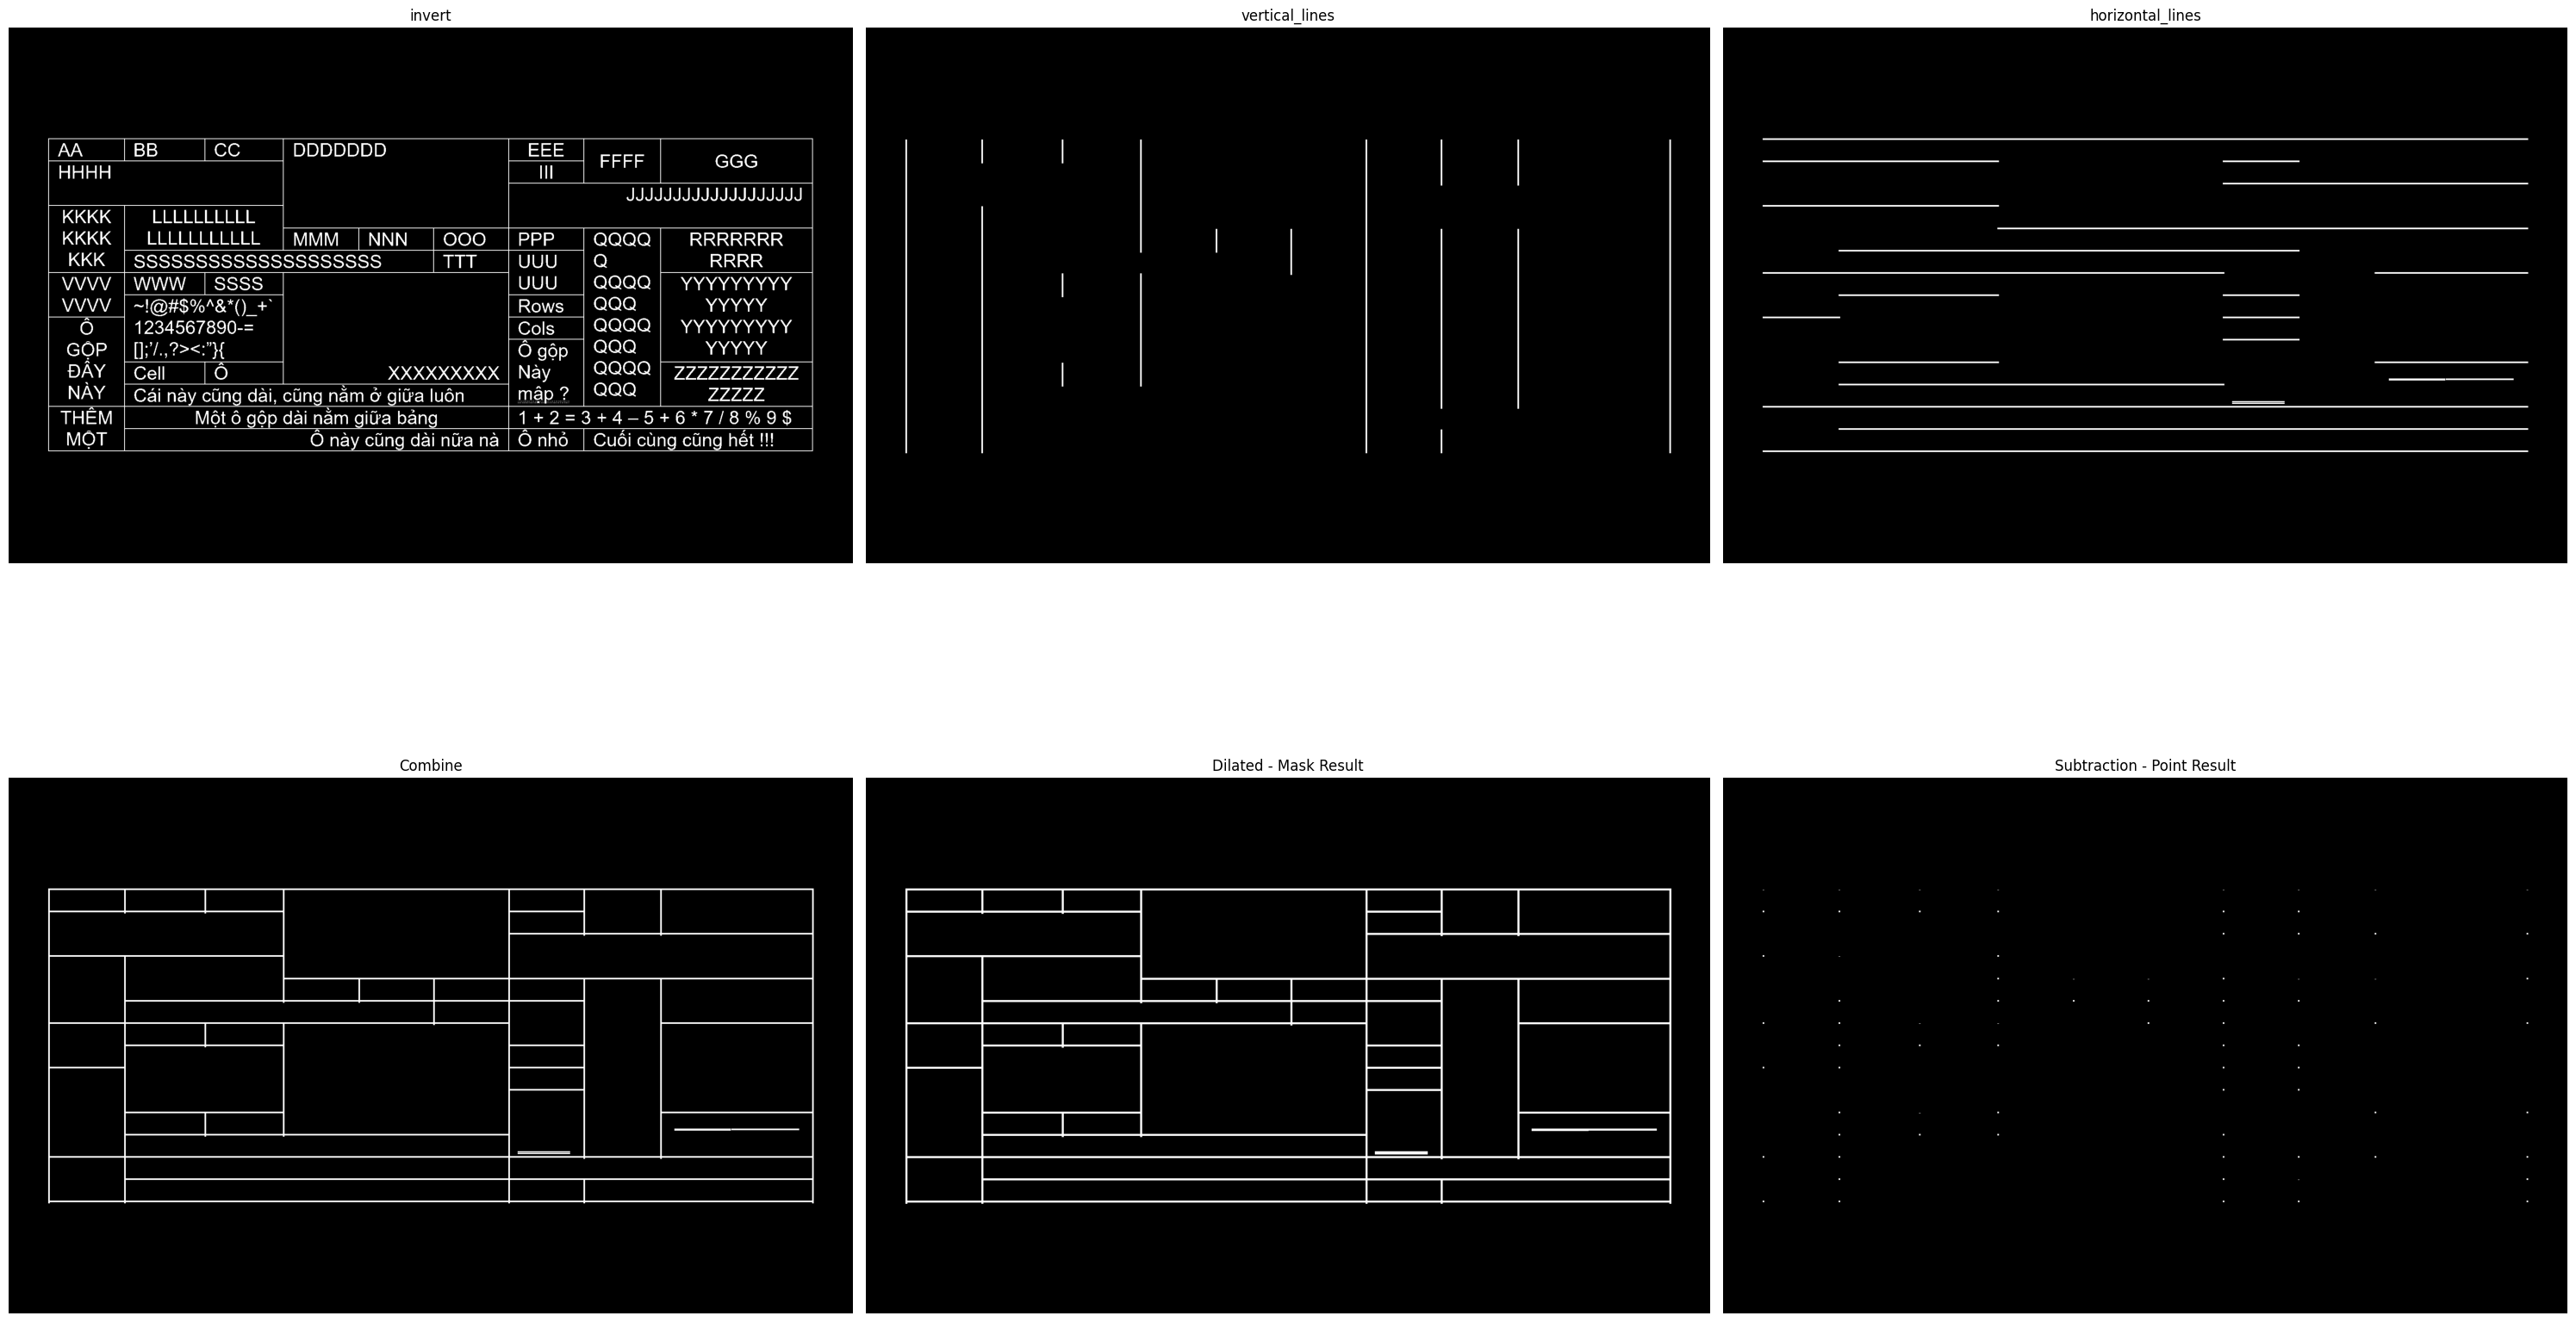

In [6]:
mask, dots, outImag = find_Lines(image_pre, 50, 80)
num_cols = 3
num_rows = len(outImag) // num_cols if len(outImag) % num_cols == 0 else len(outImag) // num_cols + 1
display_images_with_labels(outImag, (num_rows, num_cols), show_axis=False)

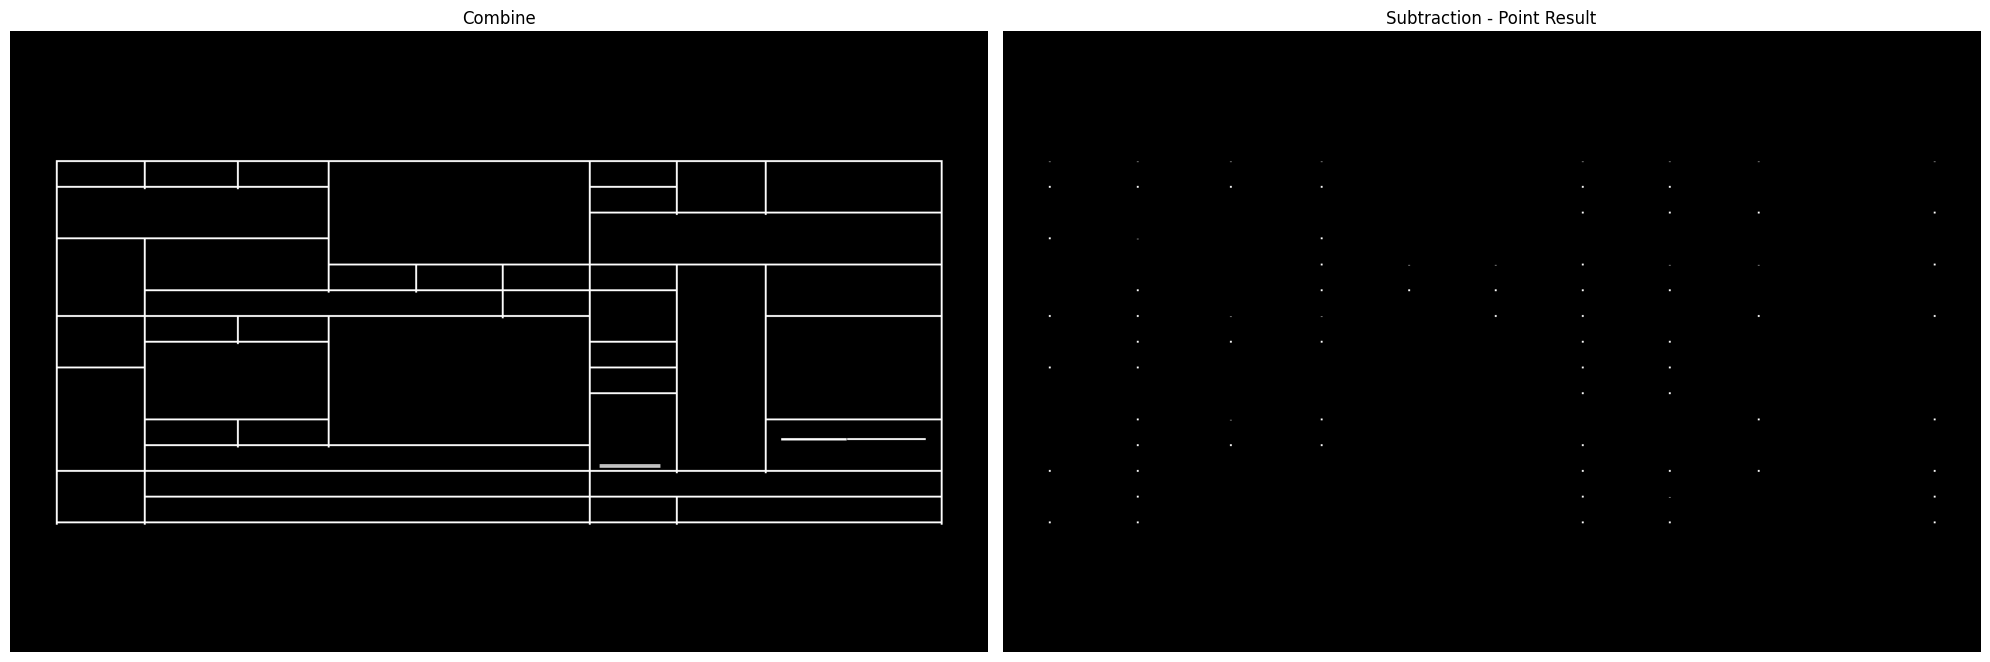

In [7]:
display_images_with_labels([outImag[-3], outImag[-1]], (1, 2), show_axis=False)

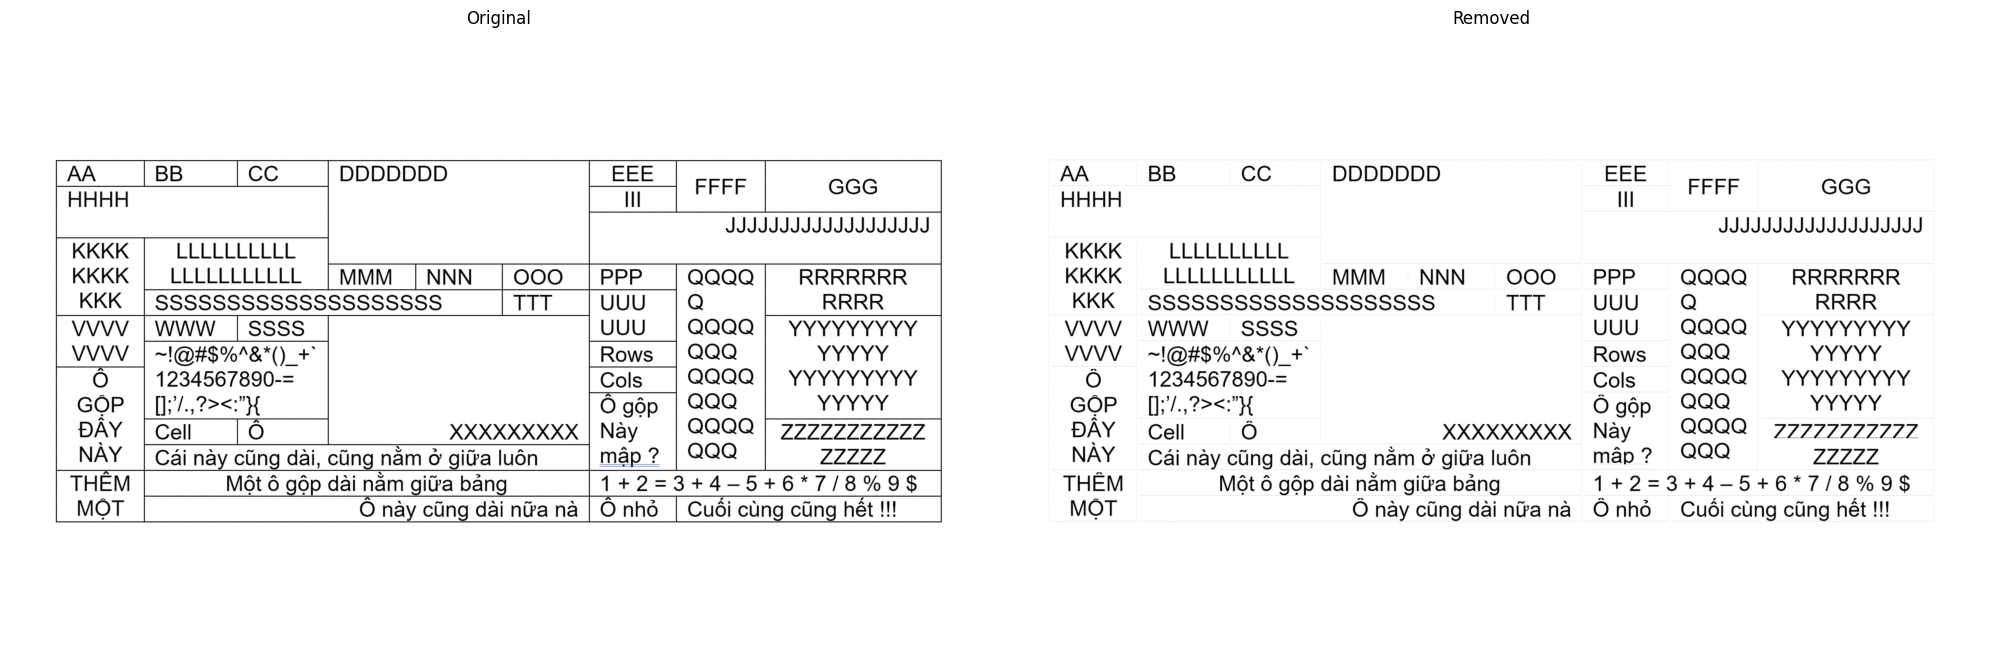

In [8]:
image_removed = remove_regions(image_ok, mask)
display_images_with_labels([(image_ok, "Original"), (image_removed, "Removed")], (1, 2), show_axis=False)

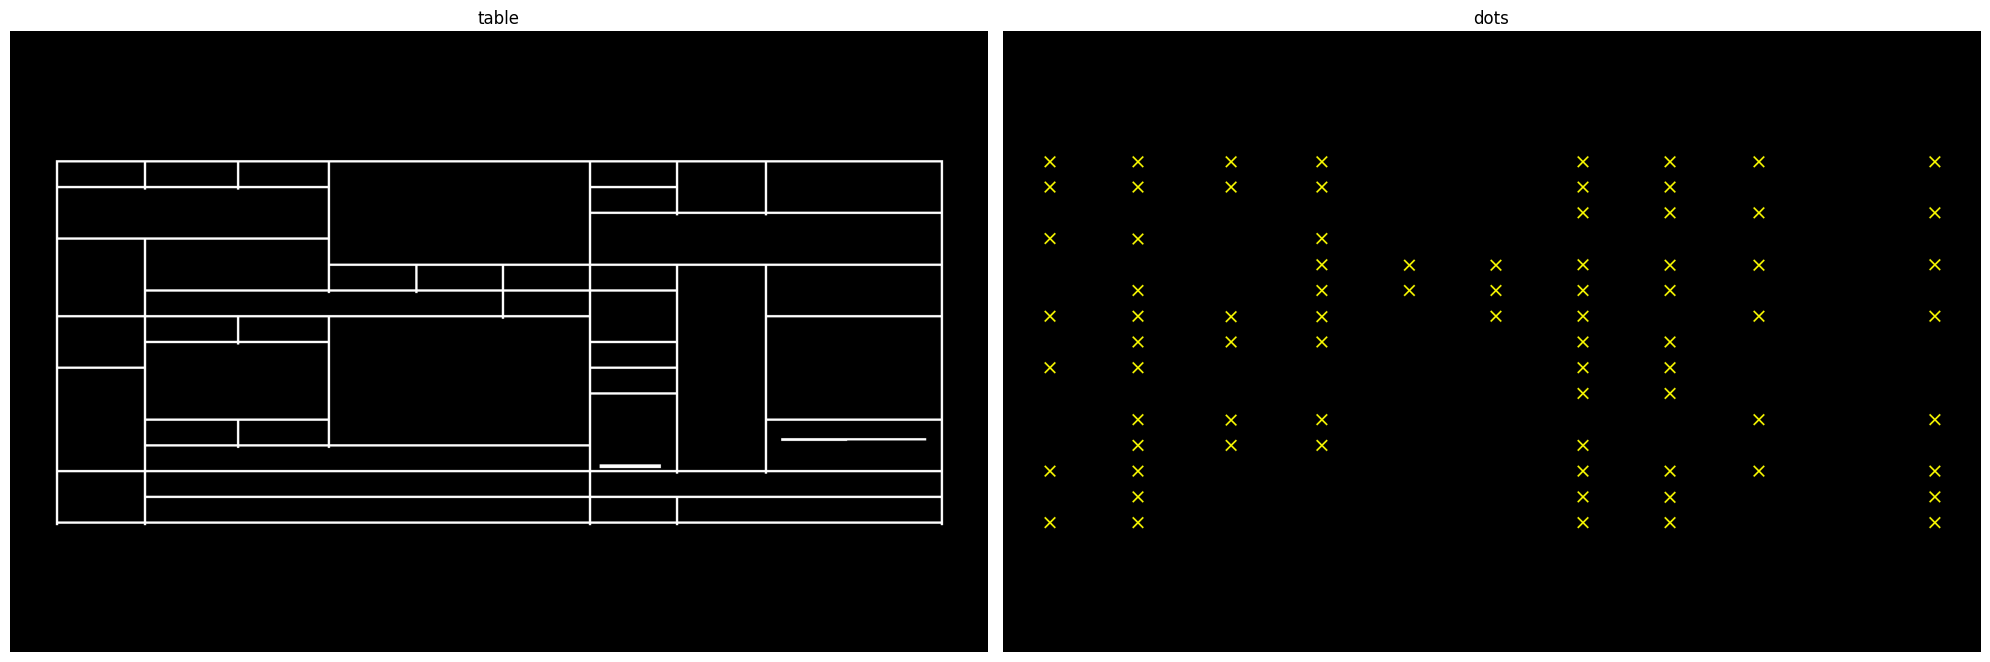

In [9]:
centers = findCenters(dots)
dots_img = drawCenters(image_ok, centers, size = 20, color=(0, 255, 255))
display_images_with_labels([(mask, "table"), (dots_img, "dots")], (1, 2), show_axis=False)

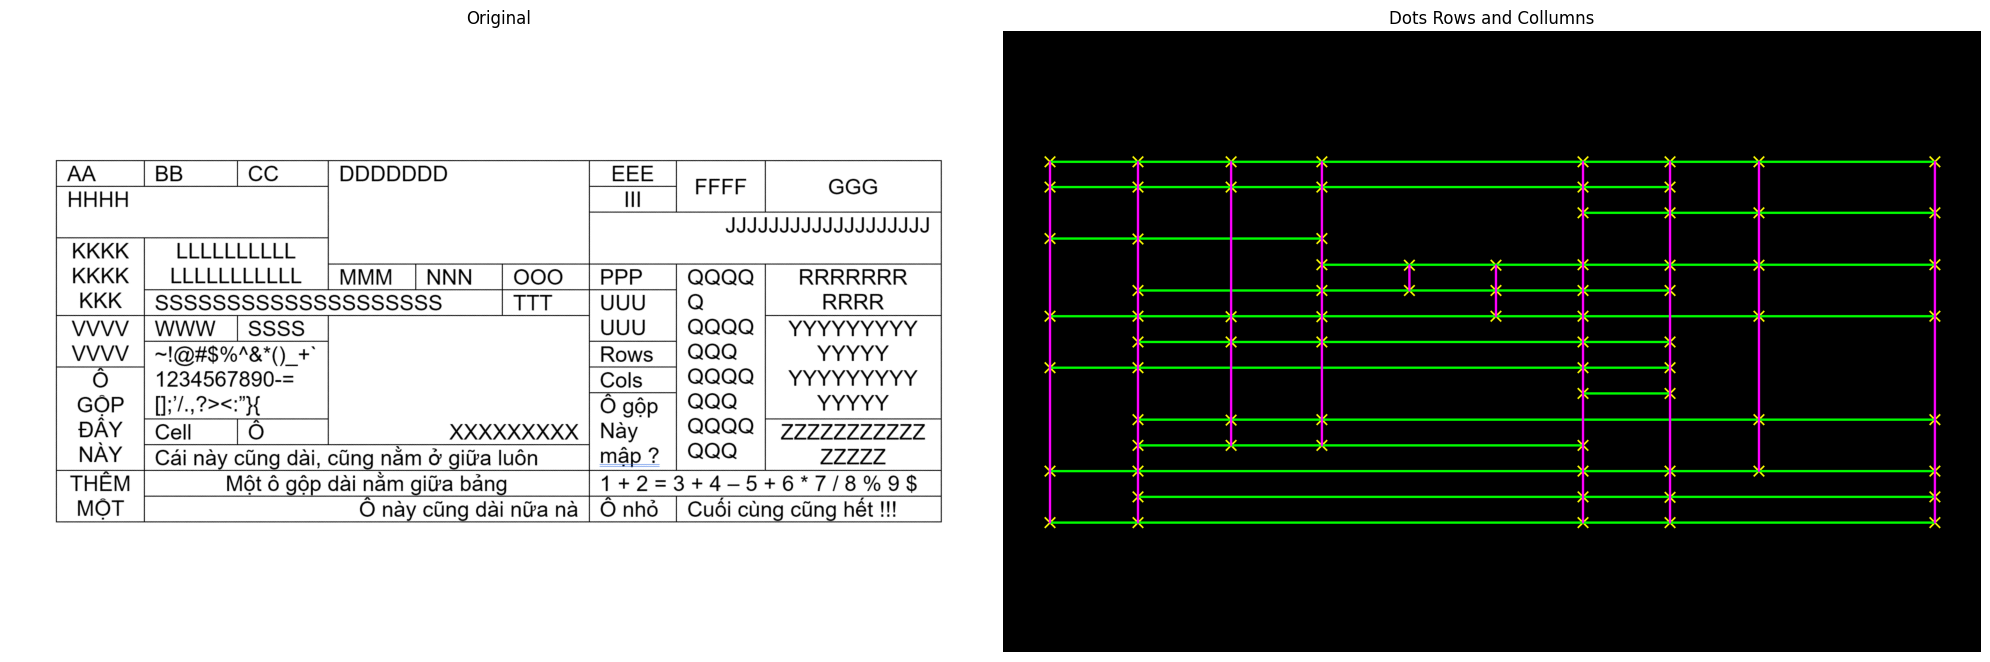

In [10]:
from utils.point import *
rows = split_rows_columns(centers, modeName='row')
columns = split_rows_columns(centers, modeName='column')
rows_collums_img = draw_rows_columns(dots_img, rows, columns)
display_images_with_labels([(image_ok, "Original"), (rows_collums_img, "Dots Rows and Collumns")], (1, 2), show_axis=False)

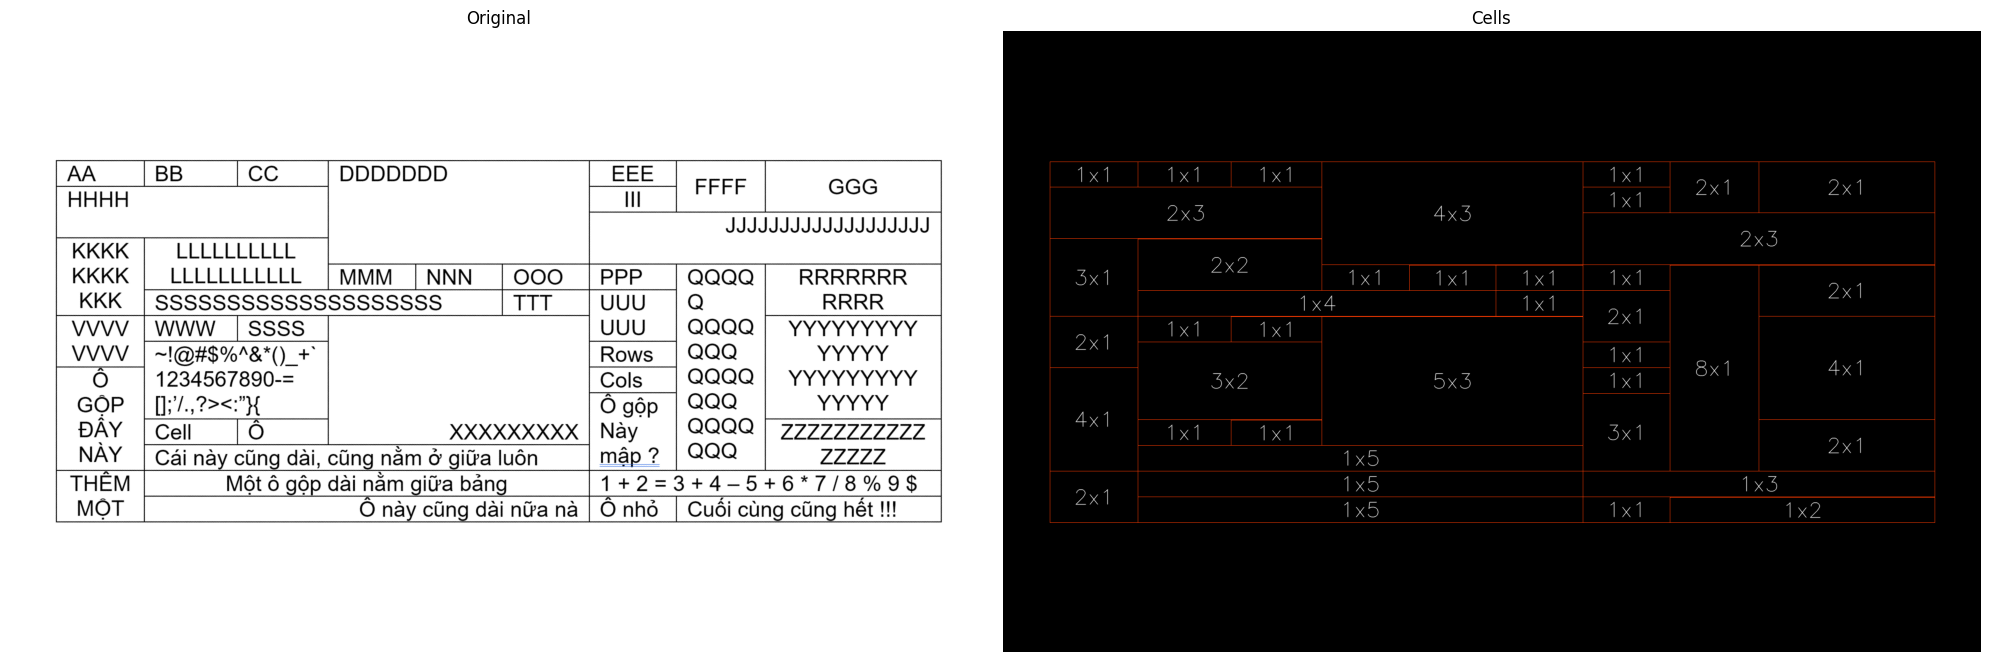

In [11]:
cells = create_cells(rows, columns, mask)
cells_img = draw_cells(rows_collums_img, cells, size=1.5, color=(255,255,255))
display_images_with_labels([(image_ok, "Original"), (cells_img, "Cells")], (1, 2), show_axis=False)

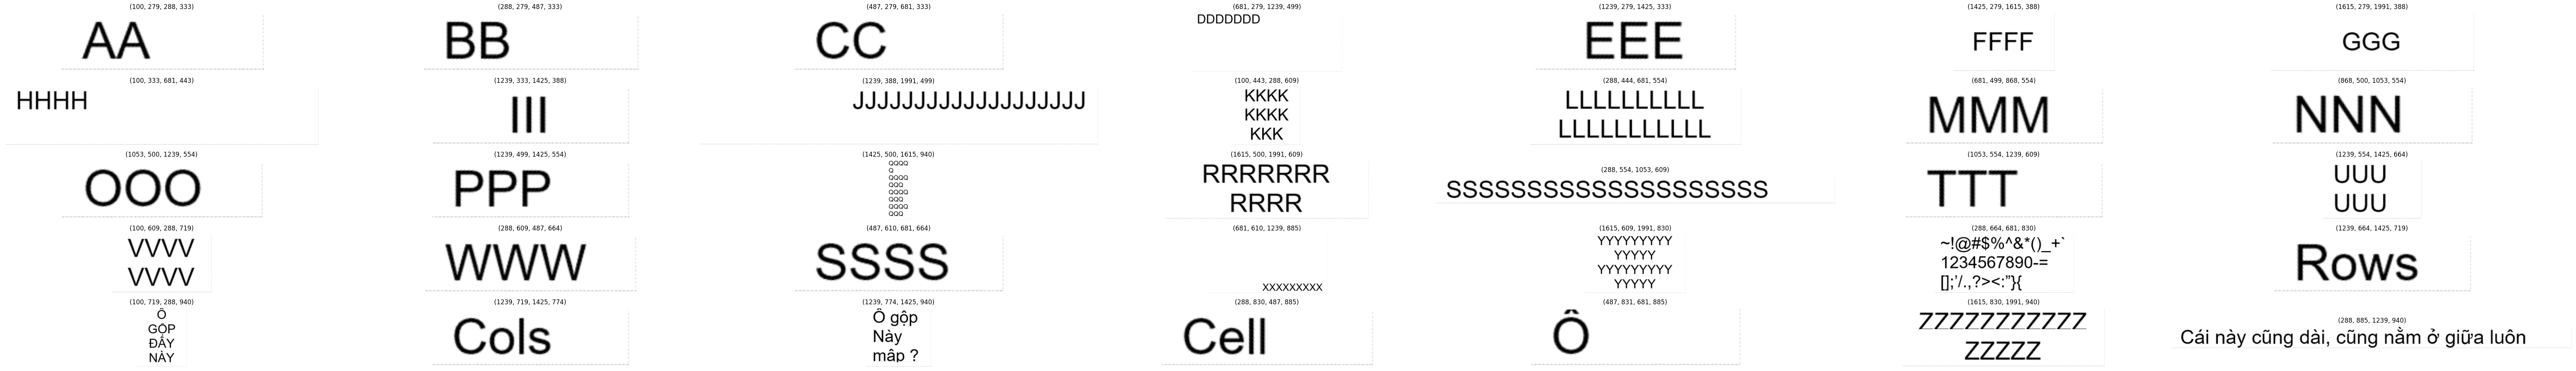

In [12]:
cells_imgs = []
for cell in cells:
    x1,y1,x2,y2 = cell['bbox']
    cropped_image = image_removed[int(y1):int(y2), int(x1):int(x2)]
    img = cropped_image #trim_white(cropped_image)
    cells_imgs += [(img, cell['bbox'])]

display_images_with_labels(cells_imgs[:35], layout = (5, 7), size = (10, 2), show_axis=False)

DDDDDDD


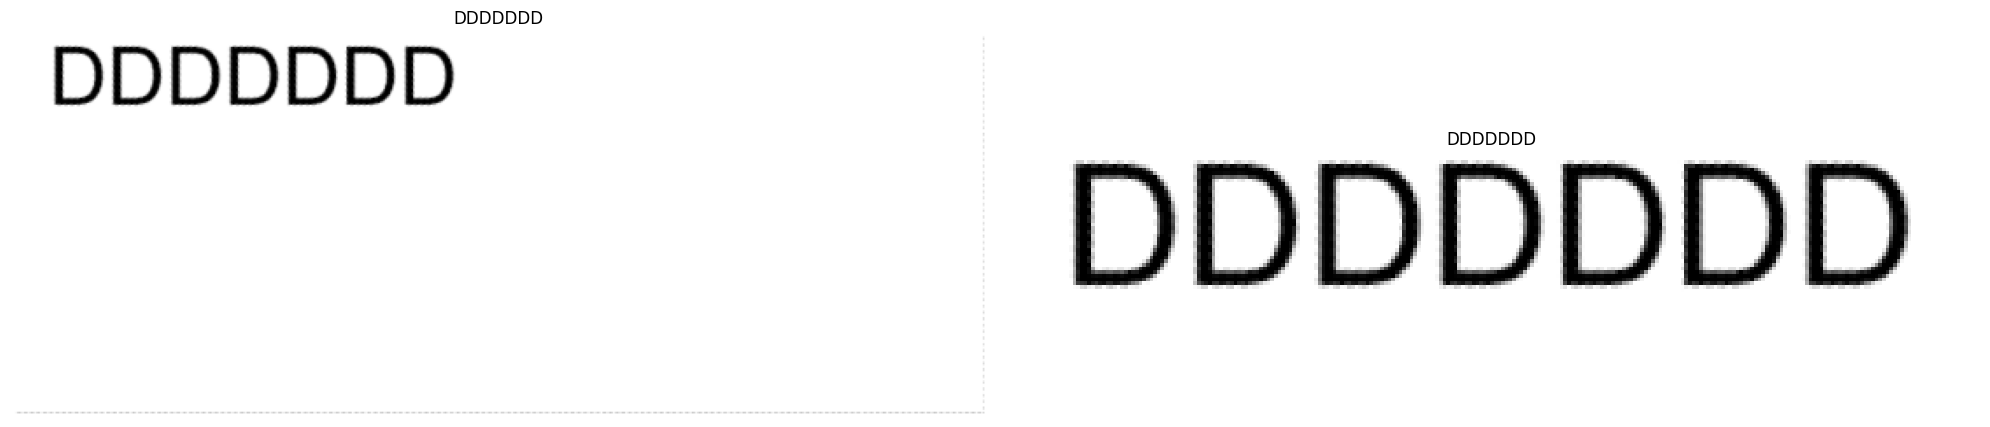

In [13]:
from utils.ocr import detectText
img = cells_imgs[3][0]
text, lines = detectText(img, detector)
print(text)
display_images_with_labels([(img, text)] + list(zip(lines, text.split('\n'))), (1, len(lines)+1), show_axis=False)

In [14]:
texts = []
for cell in cells_imgs:
  img, bbox = cell
  text, lines = detectText(img, detector)
  texts += [text]

print(texts, sep='\n')

['AA', 'BB', 'CC', 'DDDDDDD', 'EEE', 'FFFF', 'GGG', 'HISH', 'III', 'JJJJJJJJJJJJJJJJJJJJJJJJJJJ', 'KKKK\nKKKK\nKKK', 'LLLLLLLLLLL\nLLLLLLLLLLLL', 'MMM', 'NNN', '000', 'PPP', 'QQQQ\nQ\nQQQQ\nQQQ\nQQQQ\nQQQ\nQQQQ\nQQQ', 'RRRRRR\nRRRR', 'SSSSSSSSSSS', 'TTT', 'UUU\nUUU', 'VVVV\nVVVV', 'WWW', 'SSSS', 'XXXXXXXXXX', 'YYYYYYYYYY\nYYYYY\nYYYYYYYYYY\nYYYYY', '005%4&1\n1234567890\n1177,22K', 'Rows', 'O\nGỐP\nĐAY\nNAY', 'Cols', 'Ổ gộp\nNày\nmập ?', 'Cell', 'O', '77777777777\nZZZZZ', 'Cái này cũng dài, cũng năm ở giữa luôn', 'THEM\nMỐT', 'Một ô gộp dài nằm giữa bảng', '1422344566999', 'Ô Này cũng dài nữa nà', 'Ổ nhỏ', 'Cuối cùng cũng hết']


In [15]:
from utils.table import *
cells_imgs = []
for i in range(len(cells)):
  cells[i]['cell text'] = texts[i]
html = cells_to_html(cells).replace('<thead>','<tr>').replace('</thead>','</tr>').replace('\n',"<br>")
html

'<table><tr><th>AA</th><th>BB</th><th>CC</th><th colspan="3" rowspan="4">DDDDDDD</th><th>EEE</th><th rowspan="2">FFFF</th><th rowspan="2">GGG</th></tr><tr><td colspan="3" rowspan="2">HISH</td><td>III</td></tr><tr><td colspan="3" rowspan="2">JJJJJJJJJJJJJJJJJJJJJJJJJJJ</td></tr><tr><td rowspan="3">KKKK<br>KKKK<br>KKK</td><td colspan="2" rowspan="2">LLLLLLLLLLL<br>LLLLLLLLLLLL</td></tr><tr><td>MMM</td><td>NNN</td><td>000</td><td>PPP</td><td rowspan="8">QQQQ<br>Q<br>QQQQ<br>QQQ<br>QQQQ<br>QQQ<br>QQQQ<br>QQQ</td><td rowspan="2">RRRRRR<br>RRRR</td></tr><tr><td colspan="4">SSSSSSSSSSS</td><td>TTT</td><td rowspan="2">UUU<br>UUU</td></tr><tr><td rowspan="2">VVVV<br>VVVV</td><td>WWW</td><td>SSSS</td><td colspan="3" rowspan="5">XXXXXXXXXX</td><td rowspan="4">YYYYYYYYYY<br>YYYYY<br>YYYYYYYYYY<br>YYYYY</td></tr><tr><td colspan="2" rowspan="3">005%4&amp;1<br>1234567890<br>1177,22K</td><td>Rows</td></tr><tr><td rowspan="4">O<br>GỐP<br>ĐAY<br>NAY</td><td>Cols</td></tr><tr><td rowspan="3">Ổ gộp<br>Này

In [16]:
from IPython.display import display, HTML
new_html = createHTML(image_path, html, useBase64=IN_COLAB)
display(HTML(new_html))

In [17]:
from IPython.display import display, HTML
from detection.border_table_detection import recognize
display(HTML(recognize(prePath + "sample/vn1.jpg", detector, useBase64=IN_COLAB)))

In [18]:
display(HTML(recognize(prePath + "sample/L1.jpg", detector, useBase64=IN_COLAB)))

In [19]:
display(HTML(recognize(prePath + "sample/L2.jpg", detector, useBase64=IN_COLAB)))

In [20]:
display(HTML(recognize(prePath + "sample/L3.jpg", detector, useBase64=IN_COLAB)))

In [21]:
display(HTML(recognize(prePath + "sample/L4.jpg", detector, useBase64=IN_COLAB)))

In [22]:
display(HTML(recognize(prePath + "sample/L5.jpg", detector, useBase64=IN_COLAB)))

In [23]:
display(HTML(recognize(prePath + "sample/L6.jpg", detector, useBase64=IN_COLAB)))